In [19]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [20]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

#downloading and preparing sentiment analyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
#Joe's Pizza: Before
joesBefore = pd.read_csv('/content/Joe\'s Pizza Broadway Before.csv')
joesBefore.head(3)

,Date,Review
0,8-Dec-23,"Joe's is a must if you visit NYC. Ambience, se..."
1,8-Dec-23,"Excellent choice for a late night slice, the l..."
2,4-Dec-23,We came to the city for a couple of days after...


In [22]:
#getting the sentiment scores and adding them to dataframe
scores = []

for each in joesBefore['Review']:
  joesBeforeScores = sentiment.polarity_scores(each)
  #print(joesBeforeScores)
  scores.append(joesBeforeScores['compound'])

joesBefore['SentimentScore'] = scores
joesBefore.head(4)

#exporting dataframe with sentiment scores column to CSV
#https://www.freecodecamp.org/news/dataframe-to-csv-how-to-save-pandas-dataframes-by-exporting/#:~:text=to_csv()%20Method-,The%20.,format%20for%20storing%20tabular%20data.

joesBefore.to_csv('joesBeforeWithScores.csv', index=False)

In [23]:
#counting the total number of pos values to compare to overall total number of reviews

totalPositiveScoresBefore = (joesBefore['SentimentScore']>0).sum()
print(totalPositiveScoresBefore)
#1783

positiveRatioBefore = (joesBefore['SentimentScore']>0).mean()
print(positiveRatioBefore)
# so the positive review proportion here would be 1783/1965 or 0.907379


print(len(joesBefore))
#1965

totalNegativeScoresBefore = (joesBefore['SentimentScore']<=0).sum()
print(totalNegativeScoresBefore)
#182


negativeRatioBefore = (joesBefore['SentimentScore']<=0).mean()
# proportion is 182/1965 (negative) or 0.09262
print(negativeRatioBefore)

1783
0.9073791348600508
1965
182
0.0926208651399491


In [24]:
# Joe's Pizza: After
joesAfter = pd.read_csv('/content/Joe\'s Pizza Broadway After.csv')
joesAfter.head(3)

,Date,Review
0,17-Sep-24,"Of any food one could try in Manhattan, a slic..."
1,17-Sep-24,I visited this iconic pizza spot before headin...
2,16-Sep-24,I love this Joe's pizza location. It's located...


In [25]:
joesAfter=joesAfter.dropna()
joesAfter.head(-1)

scores2 = []

for each in joesAfter['Review']:
  joesAfterScores = sentiment.polarity_scores(each)
  scores2.append(joesAfterScores['compound'])

#print(scores2)

joesAfter['SentimentScore'] = scores2
joesAfter.head(4)

joesAfter.to_csv('joesAfterWithScores.csv', index=False)

In [26]:
#counting the total number of pos values to compare to overall total number of reviews

totalPositiveScoresAfter = (joesAfter['SentimentScore']>0).sum()
print(totalPositiveScoresAfter)
#227

positiveRatioAfter = (joesAfter['SentimentScore']>0).mean()
print(positiveRatioAfter)
# so the positive review proportion here would be 227/254 or 0.8937


print(len(joesAfter))
#254

totalNegativeScoresAfter = (joesAfter['SentimentScore']<=0).sum()
print(totalNegativeScoresAfter)
#27


negativeRatioAfter = (joesAfter['SentimentScore']<=0).mean()
# proportion is 27/227 (negative) or 0.106299
print(negativeRatioAfter)

227
0.8937007874015748
254
27
0.1062992125984252


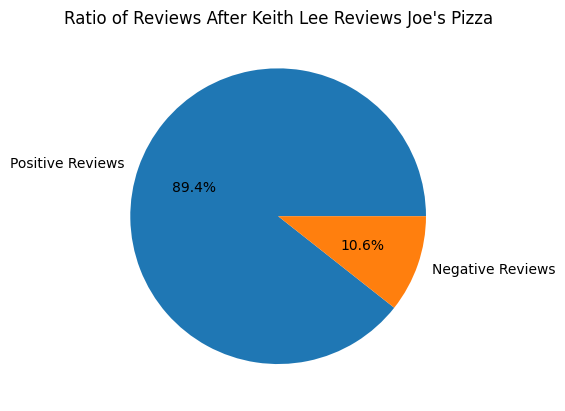

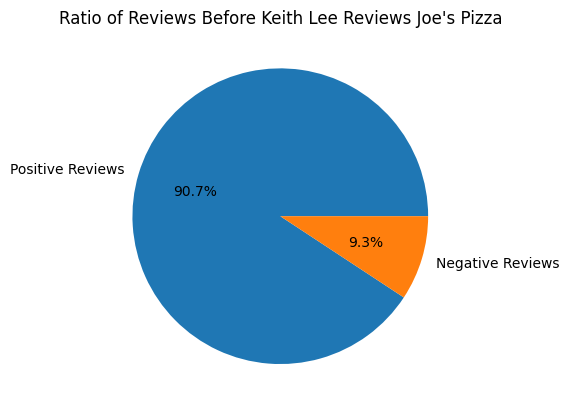

In [27]:
#making pie charts

#AFTER PIE CHART: JOE'S PIZZA
values = [positiveRatioAfter, negativeRatioAfter]

plt.pie(values, labels=('Positive Reviews', 'Negative Reviews'), autopct='%1.1f%%')
plt.title('Ratio of Reviews After Keith Lee Reviews Joe\'s Pizza')
plt.show()

#BEFORE PIE CHART: JOE'S PIZZA
values = [positiveRatioBefore, negativeRatioBefore]

plt.pie(values, labels=('Positive Reviews', 'Negative Reviews'), autopct='%1.1f%%')
plt.title('Ratio of Reviews Before Keith Lee Reviews Joe\'s Pizza')
plt.show()